In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [168]:
def convert_target(point):
    rho = point[0]
    r = point[1]
    z = point[2]

    x = r * np.cos(rho)
    y = r * np.sin(rho)

    return [-x, y, z]

In [231]:
steps = 5

In [244]:
exp_r = np.flip(np.linspace(0,0.65,steps))
exp_r

array([0.65  , 0.4875, 0.325 , 0.1625, 0.    ])

In [245]:
exp_z = np.linspace(0.25, 0.5,steps)
exp_z

array([0.25  , 0.3125, 0.375 , 0.4375, 0.5   ])

In [265]:
n_points = np.linspace(40,1,steps).astype(int)

In [266]:
test_points = []

for i,r in enumerate(exp_r):
    r = np.full(n_points[i],exp_r[i])
    for j,z in enumerate(exp_z):
        rho = np.linspace(-np.pi,np.pi,n_points[i])
        z = np.full(n_points[i],exp_z[j])
        points = np.hstack((rho.reshape(-1,1),r.reshape(-1,1),z.reshape(-1,1)))
        tmp_points = np.apply_along_axis(convert_target, 1, points)
        for p in tmp_points:
            test_points.append(p)

In [267]:
test_points = np.array(test_points)

In [271]:
test_points = np.unique(test_points, axis=0)
test_points.shape

(505, 3)

In [274]:
np.savetxt(os.path.join("..","src","test_points.txt"),test_points)

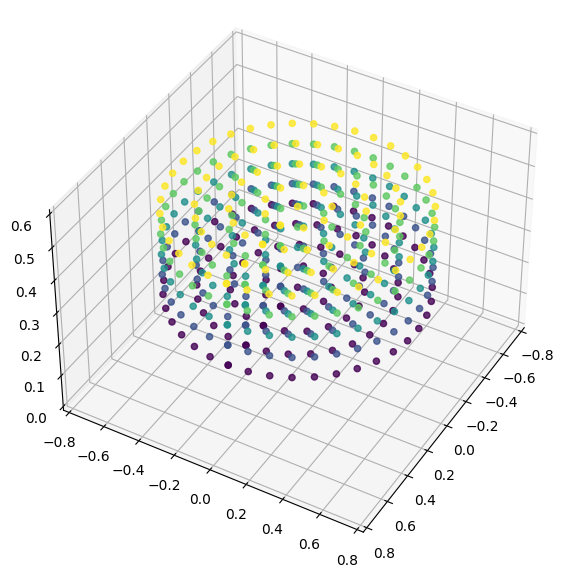

In [273]:
fig = fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.8,.8)
ax.set_ylim(-.8,.8)
ax.set_zlim(0,.6)
ax.view_init(azim=30,elev=40)
ax.scatter(test_points[:,0],test_points[:,1],test_points[:,2],c=test_points[:,2], alpha=0.8, label="targetCoM test")